
=== Método de Newton-Raphson ===
Condición inicial: x0 = 8

Iter 1: x = 8.000000, f(x) = 2.000000, f'(x) = 0.083333, x_next = -16.000000, error = 2.400000e+01
Iter 2: x = -16.000000, f(x) = -2.519842, f'(x) = 0.052497, x_next = 32.000000, error = 4.800000e+01
Iter 3: x = 32.000000, f(x) = 3.174802, f'(x) = 0.033071, x_next = -64.000000, error = 9.600000e+01
Iter 4: x = -64.000000, f(x) = -4.000000, f'(x) = 0.020833, x_next = 128.000000, error = 1.920000e+02
Iter 5: x = 128.000000, f(x) = 5.039684, f'(x) = 0.013124, x_next = -256.000000, error = 3.840000e+02
Iter 6: x = -256.000000, f(x) = -6.349604, f'(x) = 0.008268, x_next = 512.000000, error = 7.680000e+02
Iter 7: x = 512.000000, f(x) = 8.000000, f'(x) = 0.005208, x_next = -1024.000000, error = 1.536000e+03
Iter 8: x = -1024.000000, f(x) = -10.079368, f'(x) = 0.003281, x_next = 2048.000000, error = 3.072000e+03
Iter 9: x = 2048.000000, f(x) = 12.699208, f'(x) = 0.002067, x_next = -4096.000000, error = 6.144000e+03
Iter 10: x = -4096

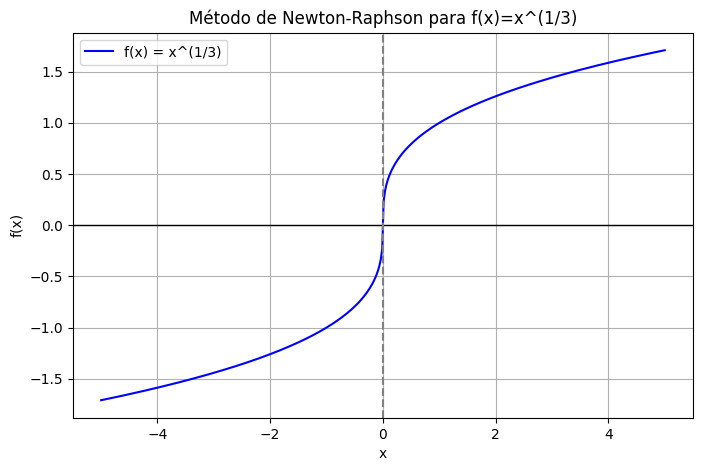


=== ANÁLISIS DE CONVERGENCIA ===
La convergencia NO es cuadrática en este caso,
ya que la derivada f'(x) se hace infinita en x = 0.
Por tanto, el método diverge cerca de x = 0.

 Sugerencias para evitar la divergencia:
- No usar valores iniciales cercanos a x = 0.
- Implementar límites para f'(x) cuando sea demasiado grande.
- Usar un método más estable (como punto fijo o bisección) si f'(x) tiende a infinito.


In [6]:
#Newton Raphson 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# FUNCIONES DEL PROBLEMA
def f(x):
    return np.cbrt(x)  # x^(1/3)

def f_prime(x):
    # Derivada: f'(x) = 1 / (3 * x^(2/3))
    # Evitamos división por cero
    if x == 0:
        return np.inf
    return 1 / (3 * (np.cbrt(x)**2))


# MÉTODO DE NEWTON-RAPHSON
def newton_raphson(x0, tol=1e-6, max_iter=50):
    iteraciones = []
    print(f"\n=== Método de Newton-Raphson ===")
    print(f"Condición inicial: x0 = {x0}\n")

    for i in range(max_iter):
        fx = f(x0)
        fpx = f_prime(x0)

        # Evitar división por cero o derivadas enormes
        if fpx == 0 or abs(fpx) > 1e6:
            print(f"Iteración {i+1}: Derivada demasiado pequeña o grande (f'(x)={fpx}). Divergencia.")
            break

        x1 = x0 - fx / fpx
        error = abs(x1 - x0)
        iteraciones.append((i+1, x0, fx, fpx, x1, error))

        print(f"Iter {i+1}: x = {x0:.6f}, f(x) = {fx:.6f}, f'(x) = {fpx:.6f}, x_next = {x1:.6f}, error = {error:.6e}")

        if error < tol:
            print("\n✅ Convergencia alcanzada.")
            return x1, i+1, iteraciones

        x0 = x1

    print("\n El método no converge o alcanzó el número máximo de iteraciones.")
    return x1, len(iteraciones), iteraciones



# PRUEBAS DE CONVERGENCIA

# Caso 1: Valor inicial lejos del 0 (debería converger lentamente)
x_inicial_1 = 8
raiz1, iter1, datos1 = newton_raphson(x_inicial_1)

# Caso 2: Valor inicial cerca de 0 (diverge)
x_inicial_2 = 0.001
raiz2, iter2, datos2 = newton_raphson(x_inicial_2)


# ANÁLISIS Y GRÁFICAS
x_vals = np.linspace(-5, 5, 400)
plt.figure(figsize=(8,5))
plt.plot(x_vals, f(x_vals), label="f(x) = x^(1/3)", color='blue')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='gray', linestyle='--')

plt.title("Método de Newton-Raphson para f(x)=x^(1/3)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


# ANÁLISIS DE CONVERGENCIA
print("\n=== ANÁLISIS DE CONVERGENCIA ===")
print("La convergencia NO es cuadrática en este caso,")
print("ya que la derivada f'(x) se hace infinita en x = 0.")
print("Por tanto, el método diverge cerca de x = 0.\n")

print(" Sugerencias para evitar la divergencia:")
print("- No usar valores iniciales cercanos a x = 0.")
print("- Implementar límites para f'(x) cuando sea demasiado grande.")
print("- Usar un método más estable (como punto fijo o bisección) si f'(x) tiende a infinito.")

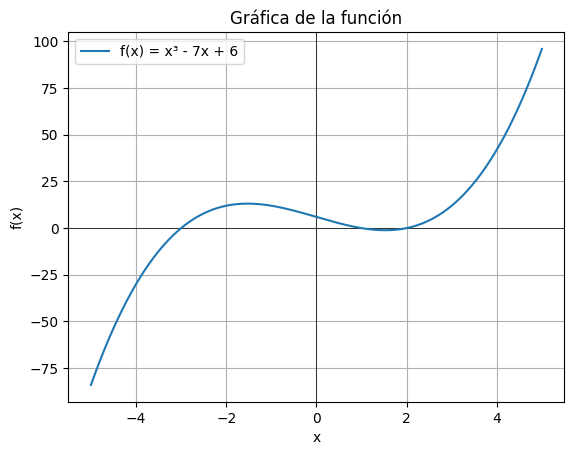


==== Resultado del Método de Bisección ====
Raíz aproximada: 2
f(raíz): 0
Número de iteraciones: 0
Tolerancia usada: 1e-05


In [ ]:
# Método de bisección 
import matplotlib.pyplot as plt
import numpy as np

# 1. Definir la función
def f(x):
    return x**3 - 7*x + 6

# 2. Graficar la función
x_vals = np.linspace(-5, 5, 400)
y_vals = f(x_vals)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.plot(x_vals, y_vals, label="f(x) = x³ - 7x + 6")
plt.title("Gráfica de la función")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# 3. Método de Bisección (con indentación correcta)
def biseccion(f, a, b, tol):
    if f(a) == 0:
        return a, 0
    if f(b) == 0:
        return b, 0
    if f(a) * f(b) > 0:
        print("El intervalo no tiene cambio de signo.")
        return None, 0

    iteraciones = 0
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            # Encontramos la raíz exacta
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iteraciones += 1

    c = (a + b) / 2
    return c, iteraciones

# 4. Ejecutar método
a = 0
b = 2
tolerancia = 1e-5

raiz, num_iteraciones = biseccion(f, a, b, tolerancia)

# 5. Mostrar resultados
print("\n==== Resultado del Método de Bisección ====")
print(f"Raíz aproximada: {raiz}")
print(f"f(raíz): {f(raiz)}")
print(f"Número de iteraciones: {num_iteraciones}")
print(f"Tolerancia usada: {tolerancia}")

